The MSE due to linear term = 23.361902892587224
The MSE due to  1 23.361902892587224
The MSE due to  2 20.252690858347492
The MSE due to  3 20.325609366315604
The MSE due to  4 20.343887109415615
The MSE due to  5 20.036401333714295
The MSE due to  6 19.883787748806622
The MSE due to  7 20.187778457887088
The MSE due to  8 20.357145671166744
The MSE due to  9 20.26849291274583
The MSE due to  10 20.11259671706724
The MSE due to  11 20.561295430971313
The MSE due to  12 26.198194241135102


Text(0, 0.5, 'MSE')

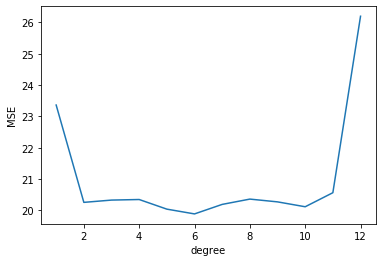

In [20]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

data_frame_cars = pd.read_csv('cars.csv')
#print(data_frame_cars.head())

train_data_frame_cars = data_frame_cars.sample(196,random_state=1).dropna(how = 'all')
test_data_frame_cars = data_frame_cars[~data_frame_cars.isin(train_data_frame_cars)].dropna(how='all')

#print(train_data_frame_cars.head())
#print(train_data_frame_cars.head())

train_data = train_data_frame_cars['horsepower'].values.reshape(-1,1)
train_data_labels = train_data_frame_cars['mpg']
test_data = test_data_frame_cars['horsepower'].values.reshape(-1,1)
test_data_labels = test_data_frame_cars['mpg']

# Using a linear regression model for the prediction
lm = skl_lm.LinearRegression()
model = lm.fit(train_data,train_data_labels)
pred = model.predict(test_data)

# Calculating the mean square error of the prediction
MSE = mean_squared_error(test_data_labels,pred)
print("The MSE due to linear term = "+str(MSE))

#Quadratic polynomial term
x = []
degrees = []
for degree in range (1,13):
    poly_quadratic = PolynomialFeatures(degree)
    train_data_quadratic = poly_quadratic.fit_transform(train_data)
    test_data_quadratic = poly_quadratic.fit_transform(test_data)

    model =lm.fit(train_data_quadratic,train_data_labels)
    
    print("The MSE due to  "+str(degree)+" "+str(mean_squared_error(test_data_labels,model.predict(test_data_quadratic))))
    x.append(mean_squared_error(test_data_labels,model.predict(test_data_quadratic)))
    degrees.append(degree)
    
plt.plot(degrees,x)
plt.xlabel("degree")
plt.ylabel("MSE")
    